# Dataset visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

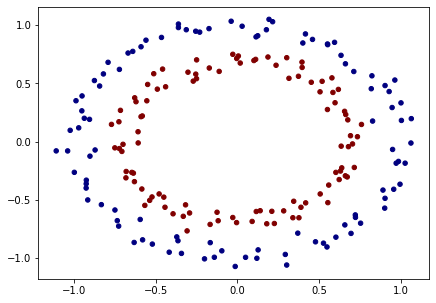

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.05, factor=0.7)

# visualize in 2D
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

# Model definition

In [13]:
from src.yaae.nn import NN

In [14]:
model = NN(nin=2, nouts=[16,16,1])
print(model)

model(
   (Linear0): Linear(row=2, column=16, isLastLayer=False)
   (Linear1): Linear(row=16, column=16, isLastLayer=False)
   (Linear2): Linear(row=16, column=1, isLastLayer=True)
)


In [16]:
def cross_entropy_loss(y_pred, y):
    # 1. Compute training loss.
    # Softmax
    y_pred.val = np.exp(y_pred.val) / np.sum(np.exp(y_pred.val), axis=0)
    
    train_loss = y * np.log(y_pred.val)
    train_loss = np.sum(train_loss) / len(train_loss)
    
    # 2. Compute training accuracy.
    train_acc = [(yi > 0) == (y_predi > 0)  for yi, y_predi in zip(y, y_pred.val[...,0])]
    train_acc = np.sum(train_acc) / len(train_acc)

    return train_loss, train_acc

In [15]:
from src.yaae.engine import Node

In [8]:
EPOCHS = 100
LR = 0.001

inputs = Node(X)

for epoch in range(EPOCHS):

    optimizer.zero_grad()

    # Forward pass.
    y_pred = model(inputs)

    train_loss, train_acc = cross_entropy_loss(y_pred, y)
    
    # Backward pass.
    train_loss.backward()

    # Parameters update.
    optimizer.step(lr=LR)

    print(f"Epoch {epoch}: train-loss: {train_loss} | train-acc: {train_acc}")

In [17]:
train_loss, train_acc = loss()

<generator object loss.<locals>.<genexpr> at 0x7ff0c193ffc0>


TypeError: iteration over a 0-d array